# **Homework for Lecture 11**

충북대학교 정보통신공학부 2021039084 유승미

https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## **1. Loading libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## **2. Loading dataset**

In [72]:
df = pd.read_csv('heart disease classification dataset.csv')

## **3. Exploratory data analysis**

### **3-(1). Data Information**

In [73]:
print(df.head())
print(df.shape)
print(df.info())

   Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    male   3     145.0  233.0    1        0    150.0      0   
1           1   37    male   2     130.0  250.0    0        1    187.0      0   
2           2   41  female   1     130.0  204.0    0        0    172.0      0   
3           3   56    male   1     120.0  236.0    0        1    178.0      0   
4           4   57  female   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal target  
0      2.3      0   0     1    yes  
1      3.5      0   0     2    yes  
2      1.4      2   0     2    yes  
3      0.8      2   0     2    yes  
4      0.6      2   0     2    yes  
(303, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex    

-----------------
**<칼럼 설명>**

1. age: 나이
2. sex: 성별 ( male, female)
3. cp: chest-pain 유형 <br>
format : 0 = typical angina , 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic
4. trestbps (Resting Blood Pressure) : 휴식 혈압 (mmHg), <br>
130-140mmHg를 초과하는 것은 일반적으로 heart disease의 원인이 된다. 
5. chol (Serum Cholestrol) :  혈청 콜레스테롤 (mg/dl)
6. fbs (Fasting Blood Sugar) : 공복 혈당값으로 120mg/dl과 비교 <br>
format : fbs > 120mg/dl then : 1 (true), 그외 : 0 (false) <br>
**126mg/dl 이상일시 당뇨병*
7. restecg (Resting ECG) : 휴식 심전도 결과 <br>
format : 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy
8. thalach ( Max heart rate achieved) : 최대 심박수
9. exang (Exercise induced angina) : 운동유발협심증 <br>
format : 1 = yes, 0 = no
10. oldpeak (ST depression induced by exercise relative to rest) : 심전도 징후 중 하나
11. slope (Slope of the peak exercise ST segment) <br>
format : 0 = upsloping : better heart rate with excercise (uncommon), <br>
1 = flat: minimal change (typical healthy heart), 2 = downsloping: signs of unhealthy heart
12. ca (Number of major vessels) : 형광 투시로 채색된 주요 혈관 수(0 ~ 3) 
13. thal (thalassemia) : 지중해빈혈 표기 <br>
format : 1,3 = normal, 6 = fixed defect,  7 = reversible defect: no proper blood movement when excercising
14. target : heart disease 인지 아닌지 <br>
format : 1 = yes, 0 = no
------------

In [74]:
df.drop(df.columns[0], axis=1, inplace = True)

**&rarr; 0번째 칼럼은 각 데이터의 인덱스 값을 표현한 칼럼으로, 데이터를 분류할 때 필요하지 않아서 삭제하였다.**

### **3-(2). Data Encoding**

KNN 알고리즘은 수치형 데이터를 다루기 때문에, object형 타입인 "sex"와 "target" 열의 인코딩 작업이 필요하다.

----

In [75]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df[obj_df.isnull().any(axis=1)]

,sex,target


**&rarr; 인코딩 전 object 타입 데이터에 결측치가 존재하는지 확인한 결과, 존재하지 않음을 알 수 있었다.**

-------

In [76]:
#before
print(df.target.unique())

['yes' 'no']


In [77]:
#after
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["target"]=le.fit_transform(df["target"])
print(df.target.head())
print(df.target.unique())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int32
[1 0]


**"target" 열은 heart disease 발생 여부를 표현하는 열로, "yes"와 "no" 두 데이터로 이루어져있다. <br>
Scikit-Learn 라이브러리의 LabelEncoder를 사용하여 수치형 데이터로 인코딩한 결과, <br>
"yes"는 1로, "no"는 0 값으로 인코딩된 결과를 확인할 수 있다.**

----

In [78]:
#before
print(df.sex.unique())

['male' 'female']


In [79]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["sex"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.get_feature_names_out(["sex"])).head()

df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.get_feature_names_out(["sex"])))

df.sex = df.sex_male
df.drop(columns=oe_style.get_feature_names_out(["sex"]), inplace=True)

In [80]:
print(df.sex.unique())

[1. 0.]


**"sex" 열은 성별을 나타내는 열로, "male"과 "female" 두 데이터로 이루어져있다. <br>
성별을 인코딩한 경우 각각의 값은 분류의 의미를 가질 뿐, 숫자의 크기에 의미가 없으며 연산 또한 무의미하다. <br>
One Hot Encoding 작업을 통해 인코딩할 경우 연산이 가능한 숫자로 인식해 칼럼 간 잘못된 관계를 맺는 경우를 방지할 수 있다 <br>
One-Hot Encoding은 각 카테고리를 독립적인 이진 특성으로 나타내기 때문에 성별을 인코딩할 경우, <br>
male과 female 두 카테고리에 대한 각각의 열이 생성되고 해당 카테고리에 속하면 1, 속하지 않으면 0의 값을 갖게 된다. <br>
"sex"열의 인코딩 결과를 male을 기준으로 나타내기 위해 sex 열의 값을 One-Hot Encoding 결과의 male 카테고리 값으로 바꾸어주었다. <br>**
**One Hot Encoding 결과를 DataFrame으로 변환가능한 형식으로 변환하기 위해 "toarray()"를 사용하였다.*

--------

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    float64
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int32  
dtypes: float64(5), int32(1), int64(8)
memory usage: 32.1 KB


**&rarr; 인코딩 결과 모든 데이터가 수치형데이터로 나타나는 것을 확인할 수 있다.**

### **3-(3). Class Inbalance?**

In [82]:
print(df['target'].value_counts())
print()
print(df['target'].value_counts()/np.float64(len(df)))

target
1    165
0    138
Name: count, dtype: int64

target
1    0.544554
0    0.455446
Name: count, dtype: float64


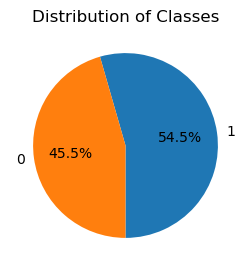

In [83]:
class_counts = df['target'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=270) # 보기 편하도록 각도 지정
plt.title('Distribution of Classes')
plt.show()

**클래스 불균형이 존재할 경우 모델은 편향된 결과를 생성할 가능성이 있어, <br>
이러한 상황에서 모델을 구축하는 것은 적절하지 않을 수 있다. <br>
때문에 데이터의 클래스 불균형 여부를 확인하는 작업이 필요하다. <br>
파이 차트를 확인해보면 target의 값이 0인 데이터가 45.5%, 1인 데이터가 54.5%로 나타났으며, <br>
대체적으로는 균형이 이루어져 있다고 판단하였다.**

### **3-(4). Exploratory data analysis: Missing Data?**

In [84]:
print(df.isnull().sum())
print(df.shape)

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(303, 14)


**누락된 데이터가 존재하는지 확인한 결과, "trestbps", "chol", "thalach" 열에 결측치가 존재하였다. <br>
모델 학습 시 결측치가 포함된 데이터를 그대로 사용하면 모델이 효과적으로 학습되지 않을 수 있으며, 부정확한 예측 결과를 유발할 수 있다. <br>
때문에 각 열의 결측치를 처리하는 작업이 필요하다.**

In [85]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(293, 14)


**결측치를 처리하는 방식으로 누락된 데이터가 존재하는 행을 모두 삭제하는 방식을 선택하였다.<br>
 전체 데이터 크기에서 10개의 행을 삭제하는 것은 데이터의 손실이 크지 않다고 판단했고, <br>
의료데이터 특성상 결측치를 다른 값으로 대체하는 방식은 타당하지 않다고 생각했기 때문이다.**

### **3-(5) Exploratory data analysis: Outliers?**

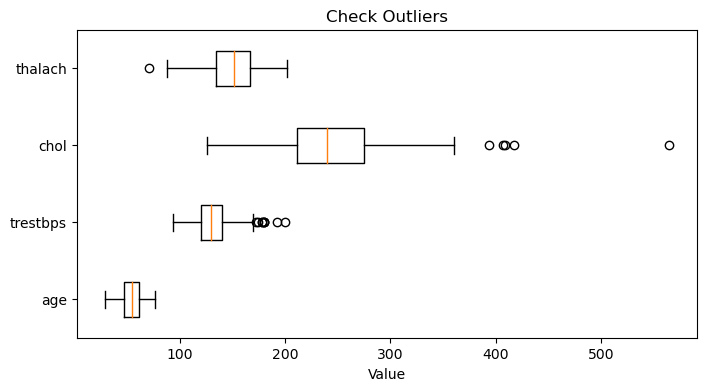

In [86]:
data_to_boxplot = df.iloc[:,[0,3,4,7]]
plt.figure(figsize=(8, 4))
plt.boxplot(data_to_boxplot, vert=False)
plt.xlabel('Value')
plt.yticks(range(1, 5), data_to_boxplot.columns)
plt.title('Check Outliers')
plt.show()

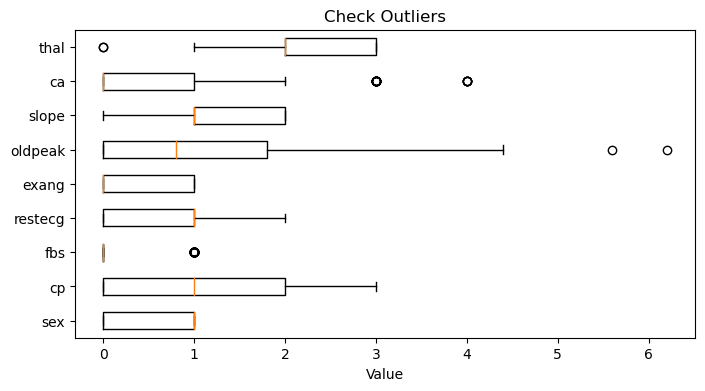

In [87]:
data_to_boxplot = df.iloc[:,[1,2,5,6,8,9,10,11,12]]
plt.figure(figsize=(8, 4))
plt.boxplot(data_to_boxplot, vert=False)
plt.xlabel('Value')
plt.yticks(range(1, 10), data_to_boxplot.columns)
plt.title('Check Outliers')
plt.show()

**EDA의 마지막 단계로 이상치를 확인하였다. <br>
그 결과, "trestbps", "thalach", "thal", "ca", "oldpeak", "fbs", "chol" 열에서 이상치가 발견됐다. <br>
그러나 의료데이터의 특성을 고려하여 필요할 수 있는 값일 수 있기 때문에 이상치를 제거하지 않기로 결정하였다. <br>
의료데이터에서 이상치가 나타날 수 있는데, 이는 실제로 의학적으로 유효하거나 환자의 특별한 상황을 나타낼 수 있기 때문이다. <br>**

## **4. Data Visualization**

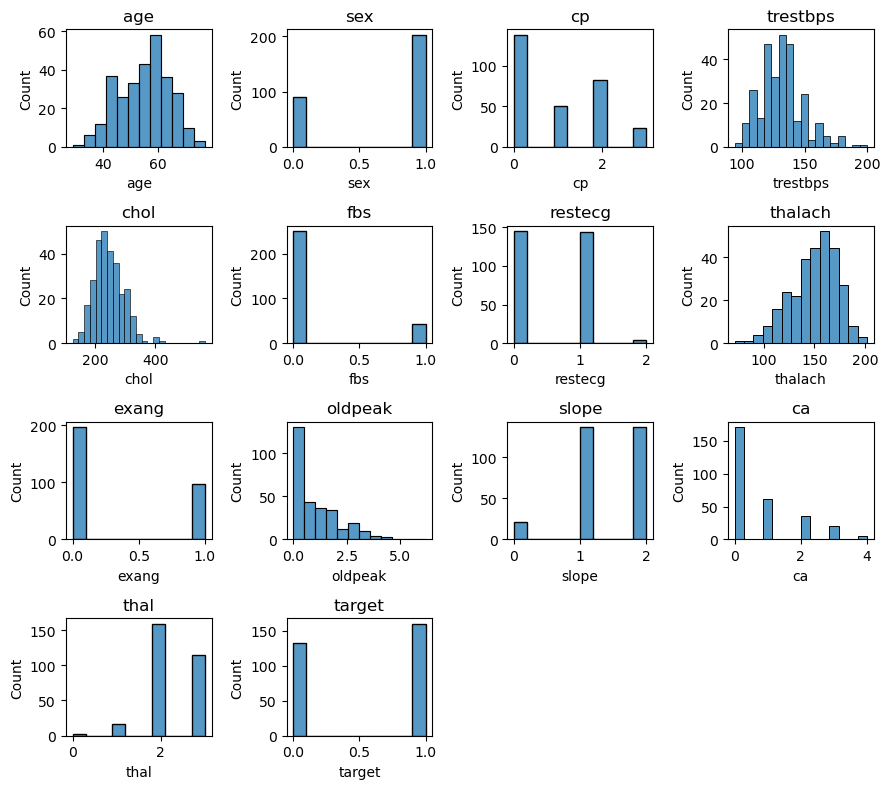

In [88]:
# 각 열에 대한 히스토그램 그리기
plt.figure(figsize=(9, 8))
for i, column in enumerate(df.columns[:], 1):
    plt.subplot(4,4, i)
    sns.histplot(df[column])  
    plt.title(column)

plt.tight_layout()
plt.show()

**&rarr; EDA를 진행한 후 정제된 데이터셋의 각 열의 데이터 분포를 확인하였다. <br><br>**

**age : 나이** <br>
40~60세 사이에 데이터가 많이 분포하며, 특히 60세의 경우가 가장 많이 분포함을 알 수 있다. <br>

**sex : 성별 (male = 1, female = 2)** <br>
여성보다 남성 데이터가 2배정도 많이 존재함을 알 수 있다. <br>

**cp : chest-pain 유형** <br>
typical angina(0), non anginal pain(2), atypical angina(1), asymptotic(3) 순으로 데이터가 많이 분포하는 것을 알 수 있다.

**trestbps (Resting Blood Pressure) : 휴식 혈압 (mmHg)** <br>
130-140mmHg 미만, 초과의 비율이 대체적으로 비슷하지만, <br>
 초과하는(heart disease의 원인) 경우가 조금 더 많이 분포하는 것을 알 수 있다. <br>

**chol (Serum Cholestrol) : 혈청 콜레스테롤 (mg/dl)** <br>
100~300mg/dl 값 사이에 많은 데이터가 존재함을 알 수 있다. <br>

**fbs (Fasting Blood Sugar) : 공복 혈당값,  fbs > 120mg/dl (1,true), 그외 (0, false)** <br>
공복 혈당값이 120mg/dl을 넘지 않는 경우가 넘는 경우보다 2배 이상 많음을 알 수 있다. <br>
126mg/dl 이상일시 당뇨병 진단으로, 당뇨병 환자가 아닌 경우가 더 많이 존재함을 알 수 있다. <br>

**restecg (Resting ECG) : 휴식 심전도 결과** <br>
Resting ECG 결과가 normal(0)이거나  having ST-T wave abnormality(1)인 경우가 비슷하게 분포하며 데이터의 대부분인 것을 알 수 있다. <br>
left ventricular hyperthrophy(2)의 경우 데이터의 작은 부분을 차지함을 알 수 있다. <br>

**thalach ( Max heart rate achieved) : 최대 심박수** <br>
최대 심박수 그래프와 나이 그래프 분포 형태가 유사하며, 이를 통해 최대심박수가 나이에 비례함을 알 수 있다.  <br>

**exang (Exercise induced angina) : 운동유발협심증 (yes = 1, no = 0)** <br>
운동유발협심증이 나타나지 않는 경우가 나타나는 경우보다 약 2배 많이 분포하는 것을 알 수 있다. <br>

**oldpeak (ST depression induced by exercise relative to rest) : 심전도 징후 중 하나** <br>
값이 클수록 데이터의 양이 적어지는 것을 확인할 수 있다. <br>

**slope (Slope of the peak exercise ST segment)** <br>
전형적인 건강한 심장(1)인 경우와 건강하지 않은 심장의 징후(2)가 대부분을 차지하며 둘의 비율이 비슷함을 알 수 있다. <br>
운동으로 심박수 향상(upsloping,0)의 경우도 데이터의 작은 부분을 차지함을 알 수 있다. <br>

**ca (Number of major vessels) : 형광 투시로 채색된 주요 혈관 수(0 ~ 3)** <br>
형광 투시로 채색된 주요 혈관 수가 많을수록 데이터의 양이 적어지는 것을 알 수 있다. <br>

**thal (thalassemia) : 지중해빈혈 표기**  <br>
1,3 은 normal한 경우로 전반적으로 normal한 것을 알 수 있다. <br>
fixed defect(6), reversible defect(7)의 경우가 존재하지 않아 결함이 없다고 판단할 수 있다. <br>

**target : heart disease 여부(1 = yes, 0 = no)** <br>
heart disease 여부의 데이터가 대체적으로 균형을 이룸을 알 수 있다.

# **Apply various classification techniques on the dataset**

## **< Decision Tree >**

### **Step 1 : Loading dataset**

In [89]:
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63  1.0   3     145.0  233.0    1        0    150.0      0      2.3   
1   37  1.0   2     130.0  250.0    0        1    187.0      0      3.5   
2   41  0.0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56  1.0   1     120.0  236.0    0        1    178.0      0      0.8   
5   57  1.0   0     140.0  192.0    0        1    148.0      0      0.4   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
5      1   0     1       1  
(293, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    float64
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    

**데이터셋의 정보는 위와 같다.**

### **Step 2 : Normalize and split into train and test dataset**

In [90]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
train_points = df.drop(columns=['target'])
train_labels = df['target']

# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=0.2, random_state=5)

**'target' 열을 라벨 데이터로 선택하고, 'target' 열을 제외한 나머지 데이터를 학습에 사용하고자 한다. <br>
모델 학습을 위해 훈련데이터와 테스트데이터이 비율은 8:2 비율으로 설정하였다. <br>
훈련데이터는 모델을 훈련하는데 사용하는 데이터이며, 테스트데이터는 모델의 성능을 테스트하기 위해 사용할 데이터다. <br>
동일한 결과를 나타내기 위해 random_state의 값은 5로 지정하였다.**

### **Step 3 : Training with Decision Tree**

In [91]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=0)

#Train the model using the training sets
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

**데이터의 학습을 위해 Decision Tree 모델을 사용하였다.**

### **Step 4 : Checking accuracy**

In [92]:
#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy of Decision Tree:", accuracy_score(y_test, guesses))

Confusion Matrix: 
 [[24 11]
 [ 5 19]]
Accuracy of Decision Tree: 0.7288135593220338


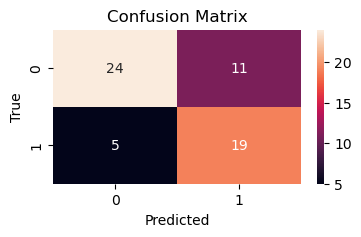

In [93]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, guesses), annot=True)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title("Confusion Matrix")
plt.show()

 **실제 라벨 값과 모델의 예측 결과를 사용하여 혼동 행렬을 생성하였다. <br>
이는 예측 결과가 실제 클래스에 얼마나 일치하고 얼마나 틀렸는지를 나타내는 행렬이며, <br>
왼쪽 위부터 오른쪽 아래까지 순서대로 True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP)를 나타낸다.<br>
이를 통해 다음 사실을 파악할 수 있다. <br>**
- Negative를 정확히 예측(TN) : 24개
- Negative로 예측되었지만 실제로는 Positive인 경우(FP) : 5개
- Positive로 예측되었지만 실제로는 Negative인 경우(FN) : 11개
- Positive를 정확히 예측(TN) : 19개
<br>

**정확도(Accuracy)는 전체 샘플 개수(TN+FP+FN+TP) 중에서 올바르게 예측한 샘플(TP+TN)의 비율로, <br>
위 모델 학습결과 약 73%의 정확도를 나타내었다.**

### **Step 5 : Improving accuracy**

**(1) Changing split ratio**

In [94]:
test_sizes = [0.2, 0.3, 0.4] # train: test = 8:2, train: test = 7:3, train: test = 6:4 비교

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)
    
    classifier = DecisionTreeClassifier(random_state=0)
    classifier.fit(X_train,y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores = metrics.accuracy_score(y_test, guesses)
    
    print("Test Size:", test_size)
    print("정확도:", accuracy_scores, "\n")

Test Size: 0.2
정확도: 0.7288135593220338 

Test Size: 0.3
정확도: 0.7727272727272727 

Test Size: 0.4
정확도: 0.7796610169491526 



**모델의 정확도를 높이기 위한 첫 번째 방안으로, 훈련데이터와 테스트데이터의 비율을 바꾸어보았다. <br>
훈련데이터와 테스트데이터의 비율(8:2, 7:3, 6:4)에 따른 정확도가 가장 높은 경우를 찾기 위해 세 경우를 비교해보았다. <br>
그 결과, train : test = 7:3인 경우 정확도는 약 77%, train : test = 6:4인 경우는 약 78%로 나타나는 것을 확인할 수 있다. <br>
초기 설정인 8:2 비율보다 6:4인 경우로 변경한 결과가 약 5% 더 높은 정확도를 나타낸다. <br>**

**(2) Feature Engineering**

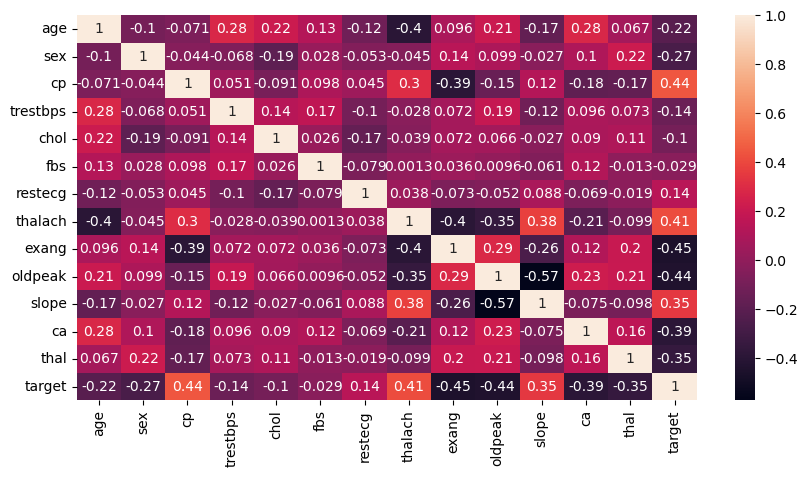

In [95]:
dfcorr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data = dfcorr, annot=True)
plt.show()

**각 Feature 간의 상관관계를 히트맵으로 시각화한 결과는 위의 그래프와 같다. <br>
모델의 정확도를 높이기 위한 방법 중 두 번째로, 상관관계가 낮은 칼럼을 삭제하는 방법이 있다. <br>
상관관계가 0에 가까워질수록 해당 특성이 라벨 데이터("target"열)를 설명하는 데 기여도가 낮아진다고 할 수 있다. <br>
따라서, "trestbps", "chol", "fbs", "restecg" 칼럼의 상관관계가 낮다고 판단하여 네 칼럼을 삭제하고 모델을 적용해보았다.**

In [96]:
df_fe = df.copy()
df_fe = df_fe.drop(columns=['trestbps', 'chol', 'fbs', 'restecg'])

In [97]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 302
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      293 non-null    int64  
 1   sex      293 non-null    float64
 2   cp       293 non-null    int64  
 3   thalach  293 non-null    float64
 4   exang    293 non-null    int64  
 5   oldpeak  293 non-null    float64
 6   slope    293 non-null    int64  
 7   ca       293 non-null    int64  
 8   thal     293 non-null    int64  
 9   target   293 non-null    int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 24.0 KB


In [98]:
train_points = df_fe.drop(columns=['target'])
train_labels = df_fe['target']

#standardize the dataset
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)
    
    classifier = DecisionTreeClassifier(random_state=0)
    classifier.fit(X_train,y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores = metrics.accuracy_score(y_test, guesses)
    
    print("Test Size:", test_size)
    print("정확도:", accuracy_scores, "\n")

Test Size: 0.2
정확도: 0.711864406779661 

Test Size: 0.3
정확도: 0.7386363636363636 

Test Size: 0.4
정확도: 0.7542372881355932 



**정확도가 가장 높은 경우를 찾기 위해 테스트 데이터의 사이즈 조정을 같이 진행한 결과, <br>
세 경우 모두 이전보다 낮아진 정확도를 확인할 수 있다. <br> 
때문에, 상관관계가 낮은 특성의 데이터를 삭제하지 않고 진행하기로 결정하였다. <br>
정확도가 감소한 이유는 해당 특성의 정보 손실 또는 모델의 과소적합으로 인한 능력 저하 등으로 예상한다.**

**(3) Feature Scaling**

In [99]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.348123,0.689420,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,1.054266,1.392491,0.730375,2.320819,0.546075
std,9.182042,0.463523,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.173169,0.618946,1.029862,0.613331,0.498724
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**모델의 정확도를 높이기 위한 방법 중 세 번째로, Feature Scaling을 말할 수 있다. <br>
"age", "trestbps", "chol", "thalach", "oldpeak" 칼럼을 정규화하여 이전과 정확도를 비교하였다.**

In [100]:
df_fs = df.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_fs[feature] = scaler.fit_transform(df_fs[feature])

In [101]:
df_fs.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.528086,0.689420,0.965870,0.355464,0.274378,0.146758,0.518771,0.602142,0.331058,0.170043,1.392491,0.730375,2.320819,0.546075
std,0.191293,0.463523,1.033114,0.166586,0.117364,0.354470,0.527162,0.172813,0.471399,0.189221,0.618946,1.029862,0.613331,0.498724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.480916,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.541667,1.000000,1.000000,0.339623,0.260274,0.000000,1.000000,0.618321,0.000000,0.129032,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.340183,0.000000,1.000000,0.732824,1.000000,0.290323,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [102]:
train_points = df_fs.drop(columns=['target'])
train_labels = df_fs['target']

#standardize the dataset
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)
    
    classifier = DecisionTreeClassifier(random_state=0)
    classifier.fit(X_train,y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores = metrics.accuracy_score(y_test, guesses)
    
    print("Test Size:", test_size)
    print("정확도:", accuracy_scores, "\n")

Test Size: 0.2
정확도: 0.7288135593220338 

Test Size: 0.3
정확도: 0.7727272727272727 

Test Size: 0.4
정확도: 0.7796610169491526 



**정확도가 가장 높은 경우를 찾기 위해 테스트 데이터의 사이즈 조정을 같이 진행한 결과, <br>
train : test = 6:4인 경우 약 78%의 정확도로 이전과 동일함을 알 수 있다.**

## **< Random Forest >**

### **Step 1 : Loading dataset**

In [103]:
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63  1.0   3     145.0  233.0    1        0    150.0      0      2.3   
1   37  1.0   2     130.0  250.0    0        1    187.0      0      3.5   
2   41  0.0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56  1.0   1     120.0  236.0    0        1    178.0      0      0.8   
5   57  1.0   0     140.0  192.0    0        1    148.0      0      0.4   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
5      1   0     1       1  
(293, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    float64
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    

**데이터셋의 정보는 위와 같다.**

### **Step 2 : Normalize and split into train and test dataset**

In [104]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
train_points = df.drop(columns=['target'])
train_labels = df['target']

# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=0.2, random_state=5)

**'target' 열을 라벨 데이터로 선택하고, 'target' 열을 제외한 나머지 데이터를 학습에 사용하고자 한다. <br>
모델 학습을 위해 훈련데이터와 테스트데이터이 비율은 8:2 비율으로 설정하였다. <br>
훈련데이터는 모델을 훈련하는데 사용하는 데이터이며, 테스트데이터는 모델의 성능을 테스트하기 위해 사용할 데이터다. <br>
동일한 결과를 나타내기 위해 random_state의 값은 5로 지정하였다.**

### **Step 3 : Training with Random Forest**

In [115]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(random_state=0, n_estimators=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

**데이터의 학습을 위해 Random Forest 모델을 사용하였다.**

### **Step 4 : Checking accuracy**

In [116]:
#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest:", accuracy_score(y_test, guesses))

Confusion Matrix: 
 [[29  6]
 [ 6 18]]
Accuracy of Random Forest: 0.7966101694915254


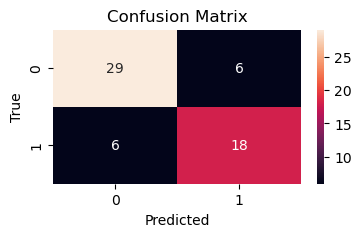

In [117]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, guesses), annot=True)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title("Confusion Matrix")
plt.show()

 **실제 라벨 값과 모델의 예측 결과를 사용하여 혼동 행렬을 생성하였다. <br>
이는 예측 결과가 실제 클래스에 얼마나 일치하고 얼마나 틀렸는지를 나타내는 행렬이며, <br>
왼쪽 위부터 오른쪽 아래까지 순서대로 True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP)를 나타낸다.<br>
이를 통해 다음 사실을 파악할 수 있다. <br>**
- Negative를 정확히 예측(TN) : 29개
- Negative로 예측되었지만 실제로는 Positive인 경우(FP) : 6개
- Positive로 예측되었지만 실제로는 Negative인 경우(FN) : 6개
- Positive를 정확히 예측(TN) : 18개
<br>

**정확도(Accuracy)는 전체 샘플 개수(TN+FP+FN+TP) 중에서 올바르게 예측한 샘플(TP+TN)의 비율로, <br>
위 모델 학습결과 약 80%의 정확도를 나타내었다.**

### **Step 5 : Improving accuracy**

**(1) Tuning n parameter**

[0.7966101694915254, 0.8135593220338984, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.8305084745762712, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8305084745762712, 0.8135593220338984, 0.8135593220338984, 0.7966101694915254, 0.8135593220338984, 0.8135593220338984, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7796610169491526, 0.7966101694915254, 0.7796610169491526, 0.7966101694915254, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526,

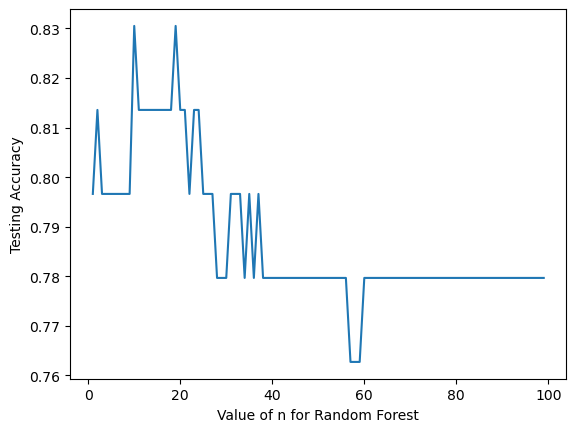

In [119]:
n_range = range(1, 100)
accuracy_scores = []

for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

max_accuracy = max(accuracy_scores)
max_n = n_range[accuracy_scores.index(max_accuracy)]

print("\n최대 정확도: ",max_accuracy,"n =", max_n)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

**모델의 정확도를 높이기 위한 첫 번째 방안으로, n값을 튜닝해보았다. <br>
n값을 1부터 100까지 순차적으로 늘려가면서 최대 정확도가 언제 나타나는지 확인하였다. <br>
튜닝 결과 n값이 10일 때 가장 높은 정확도를 나타내었으며, 그 때의 정확도는 약 83%이다.**

**(2) Changing split ratio**

Test Size: 0.2
최대 정확도:  0.8305084745762712 n = 10 

Test Size: 0.3
최대 정확도:  0.8636363636363636 n = 21 

Test Size: 0.4
최대 정확도:  0.8559322033898306 n = 47 



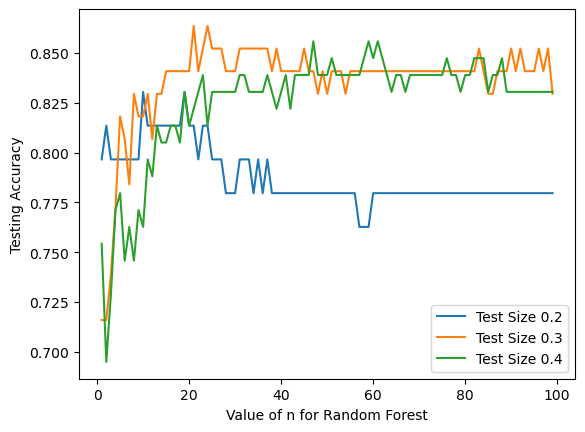

In [124]:
test_sizes = [0.2, 0.3, 0.4] # train: test = 8:2, train: test = 7:3, train: test = 6:4 비교

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)

    n_range = range(1, 100)
    accuracy_scores = []

    for n in n_range:
        classifier = RandomForestClassifier(random_state=0, n_estimators=n)
        classifier.fit(X_train, y_train)
        guesses = classifier.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, guesses))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]

    print("Test Size:", test_size)
    print("최대 정확도: ",max_accuracy,"n =", max_n, "\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

**모델의 정확도를 높이기 위한 두 번째 방안으로, 훈련데이터와 테스트데이터의 비율을 바꾸어보았다. <br>
훈련데이터와 테스트데이터의 비율(8:2, 7:3, 6:4)에 따른 정확도가 가장 높은 경우를 찾기 위해 세 경우를 비교해보았다. <br>
n값 튜닝도 같이 진행한 결과, <br>
train : test = 7:3인 경우 최대 정확도는 약 86%(n=21), train : test = 6:4인 경우는 약 85%(n=47)의 최대 정확도를 나타냈다. <br>
초기 설정인 8:2 비율보다 7:3으로 변경한 경우 더 높은 정확도를 얻을 수 있었다.**

**(3) Feature Engineering**

In [136]:
df_fe.head(1)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,150.0,0,2.3,0,0,1,1


**모델의 정확도를 높이기 위한 방법 중 세 번째로, 상관관계가 낮은 칼럼을 삭제하는 방법이 있다. <br>
상관관계가 0에 가까워질수록 해당 특성이 라벨 데이터("target"열)를 설명하는 데 기여도가 낮아진다고 할 수 있다. <br>
따라서, 앞선 decision tree 알고리즘에서 진행한 것과 같은 방식으로 <br>
"trestbps", "chol", "fbs", "restecg" 칼럼을 삭제한 데이터셋을 사용해 모델을 적용해보았다.**

Test Size: 0.2
최대 정확도:  0.847457627118644 n = 11 

Test Size: 0.3
최대 정확도:  0.8522727272727273 n = 36 

Test Size: 0.4
최대 정확도:  0.847457627118644 n = 5 



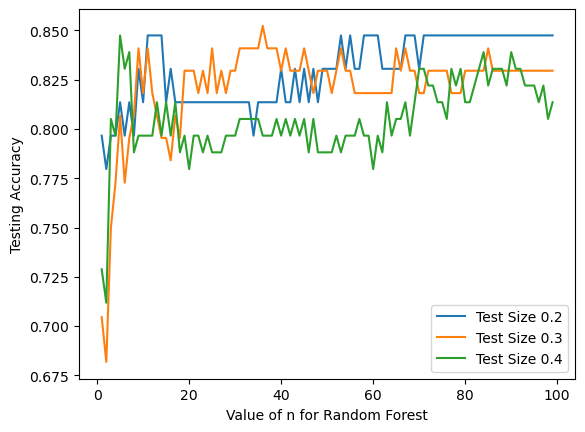

In [130]:
train_points = df_fe.drop(columns=['target'])
train_labels = df_fe['target']

#standardize the dataset
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)

    n_range = range(1, 100)
    accuracy_scores = []

    for n in n_range:
        classifier = RandomForestClassifier(random_state=0, n_estimators=n)
        classifier.fit(X_train, y_train)
        guesses = classifier.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, guesses))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]

    print("Test Size:", test_size)
    print("최대 정확도: ",max_accuracy,"n =", max_n, "\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

**정확도가 가장 높은 경우를 찾기 위해 테스트 데이터의 사이즈 조정과 n값 튜닝을 같이 진행한 결과, <br>
세 경우 모두 이전보다 낮아진 정확도를 확인할 수 있다. <br> 
때문에, 상관관계가 낮은 특성의 데이터를 삭제하지 않고 진행하기로 결정하였다.**

**(4) Feature Scaling**

**모델의 정확도를 높이기 위한 방법 중 네 번째로, Feature Scaling을 말할 수 있다. <br>
앞서 decision tree 알고리즘의 정확도를 올리기 위해 생성한 데이터셋인 <br>
"age", "trestbps", "chol", "thalach", "oldpeak" 칼럼을 정규화한 데이터셋을 사용해 이전과 비교해보았다.**

In [138]:
df_fs.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.528086,0.689420,0.965870,0.355464,0.274378,0.146758,0.518771,0.602142,0.331058,0.170043,1.392491,0.730375,2.320819,0.546075
std,0.191293,0.463523,1.033114,0.166586,0.117364,0.354470,0.527162,0.172813,0.471399,0.189221,0.618946,1.029862,0.613331,0.498724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.480916,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.541667,1.000000,1.000000,0.339623,0.260274,0.000000,1.000000,0.618321,0.000000,0.129032,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.340183,0.000000,1.000000,0.732824,1.000000,0.290323,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


Test Size: 0.2
최대 정확도:  0.8305084745762712 n = 10 

Test Size: 0.3
최대 정확도:  0.8636363636363636 n = 21 

Test Size: 0.4
최대 정확도:  0.8559322033898306 n = 47 



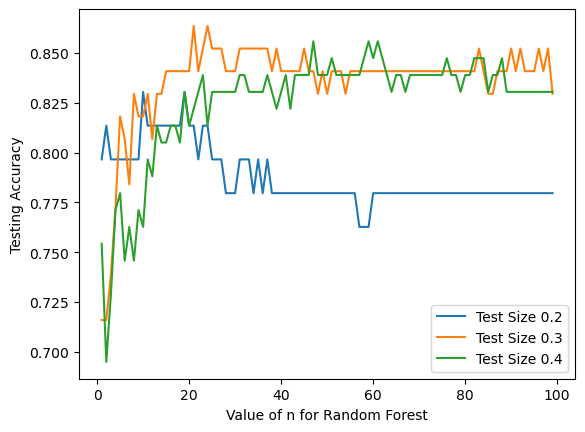

In [139]:
train_points = df_fs.drop(columns=['target'])
train_labels = df_fs['target']

#standardize the dataset
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)

    n_range = range(1, 100)
    accuracy_scores = []

    for n in n_range:
        classifier = RandomForestClassifier(random_state=0, n_estimators=n)
        classifier.fit(X_train, y_train)
        guesses = classifier.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, guesses))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]

    print("Test Size:", test_size)
    print("최대 정확도: ",max_accuracy,"n =", max_n, "\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

**정확도가 가장 높은 경우를 찾기 위해 테스트 데이터의 사이즈 조정과 n값 튜닝을 같이 진행한 결과, <br>
train : test = 7:3인 경우 약  86%의 정확도로 이전과 동일함을 알 수 있다.**

## **< Adaboost >**

### **Step 1 : Loading dataset**

In [140]:
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63  1.0   3     145.0  233.0    1        0    150.0      0      2.3   
1   37  1.0   2     130.0  250.0    0        1    187.0      0      3.5   
2   41  0.0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56  1.0   1     120.0  236.0    0        1    178.0      0      0.8   
5   57  1.0   0     140.0  192.0    0        1    148.0      0      0.4   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
5      1   0     1       1  
(293, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    float64
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    

**데이터셋의 정보는 위와 같다.**

### **Step 2 : Normalize and split into train and test dataset**

In [141]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
train_points = df.drop(columns=['target'])
train_labels = df['target']

# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=0.2, random_state=5)

**'target' 열을 라벨 데이터로 선택하고, 'target' 열을 제외한 나머지 데이터를 학습에 사용하고자 한다. <br>
모델 학습을 위해 훈련데이터와 테스트데이터이 비율은 8:2 비율으로 설정하였다. <br>
훈련데이터는 모델을 훈련하는데 사용하는 데이터이며, 테스트데이터는 모델의 성능을 테스트하기 위해 사용할 데이터다. <br>
동일한 결과를 나타내기 위해 random_state의 값은 5로 지정하였다.**

### **Step 3 : Training with Adaboost**

In [142]:
#Import Adaboost
from sklearn.ensemble import AdaBoostClassifier

#Create a Gaussian Classifier
classifier = AdaBoostClassifier(random_state=0, n_estimators=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

**데이터의 학습을 위해 Adaboost 모델을 사용하였다.**

### **Step 4 : Checking accuracy**

In [143]:
#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy of Adaboost:", accuracy_score(y_test, guesses))

Confusion Matrix: 
 [[24 11]
 [ 3 21]]
Accuracy of Adaboost: 0.7627118644067796


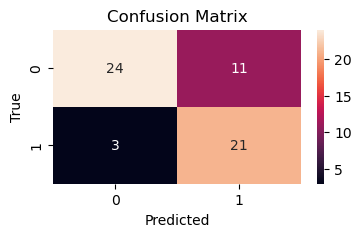

In [144]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, guesses), annot=True)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title("Confusion Matrix")
plt.show()

 **실제 라벨 값과 모델의 예측 결과를 사용하여 혼동 행렬을 생성하였다. <br>
이는 예측 결과가 실제 클래스에 얼마나 일치하고 얼마나 틀렸는지를 나타내는 행렬이며, <br>
왼쪽 위부터 오른쪽 아래까지 순서대로 True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP)를 나타낸다.<br>
이를 통해 다음 사실을 파악할 수 있다. <br>**
- Negative를 정확히 예측(TN) : 24개
- Negative로 예측되었지만 실제로는 Positive인 경우(FP) : 3개
- Positive로 예측되었지만 실제로는 Negative인 경우(FN) : 11개
- Positive를 정확히 예측(TN) : 21개
<br>

**정확도(Accuracy)는 전체 샘플 개수(TN+FP+FN+TP) 중에서 올바르게 예측한 샘플(TP+TN)의 비율로, <br>
위 모델 학습결과 약 76%의 정확도를 나타내었다.**

### **Step 5 : Improving accuracy**

**(1) Tuning n parameter**

[0.7288135593220338, 0.7288135593220338, 0.7457627118644068, 0.7966101694915254, 0.7627118644067796, 0.8305084745762712, 0.8135593220338984, 0.8135593220338984, 0.7796610169491526, 0.7966101694915254, 0.7796610169491526, 0.7966101694915254, 0.7796610169491526, 0.7796610169491526, 0.7966101694915254, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7627118644067796, 0.7627118644067796, 0.7627118644067796, 0.7796610169491526, 0.7627118644067796, 0.7966101694915254, 0.7796610169491526, 0.7796610169491526, 0.7627118644067796, 0.7627118644067796, 0.7627118644067796, 0.7457627118644068, 0.7288135593220338, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7627118644067796, 0.7457627118644068, 0.7457627118644068, 0.7288135593220338, 0.7288135593220338, 0.6949152542372882, 0.6949152542372882, 0.6779661016949152, 0.6949152542372882,

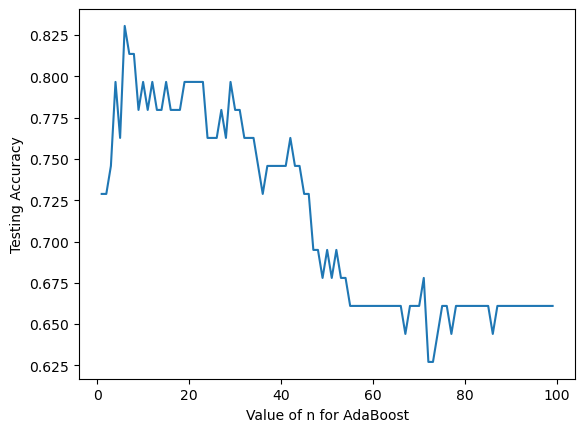

In [149]:
n_range = range(1, 100)
accuracy_scores = []

for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

max_accuracy = max(accuracy_scores)
max_n = n_range[accuracy_scores.index(max_accuracy)]

print("\n최대 정확도: ",max_accuracy,"n =", max_n)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for AdaBoost')
plt.ylabel('Testing Accuracy')
plt.show()

**모델의 정확도를 높이기 위한 첫 번째 방안으로, n값을 튜닝해보았다. <br>
n값을 1부터 100까지 순차적으로 늘려가면서 최대 정확도가 언제 나타나는지 확인하였다. <br>
튜닝 결과 n값이 6일 때 가장 높은 정확도를 나타내었으며, 그 때의 정확도는 약 83%이다.**

**(2) Changing split ratio**

Test Size: 0.2
최대 정확도:  0.8305084745762712 n = 6 

Test Size: 0.3
최대 정확도:  0.8409090909090909 n = 16 

Test Size: 0.4
최대 정확도:  0.847457627118644 n = 8 



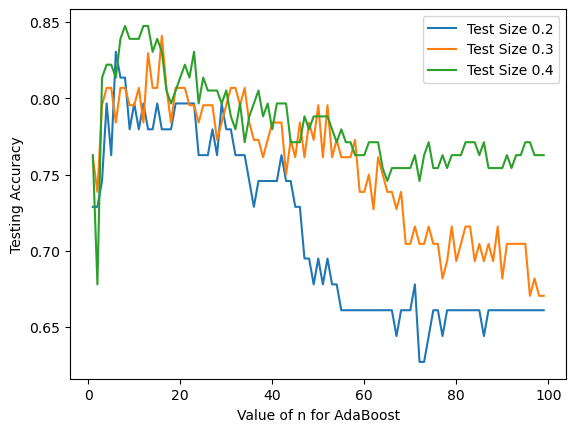

In [151]:
test_sizes = [0.2, 0.3, 0.4] # train: test = 8:2, train: test = 7:3, train: test = 6:4 비교

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)

    n_range = range(1, 100)
    accuracy_scores = []

    for n in n_range:
        classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
        classifier.fit(X_train, y_train)
        guesses = classifier.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, guesses))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]

    print("Test Size:", test_size)
    print("최대 정확도: ",max_accuracy,"n =", max_n, "\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for AdaBoost')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

**모델의 정확도를 높이기 위한 두 번째 방안으로, 훈련데이터와 테스트데이터의 비율을 바꾸어보았다. <br>
훈련데이터와 테스트데이터의 비율(8:2, 7:3, 6:4)에 따른 정확도가 가장 높은 경우를 찾기 위해 세 경우를 비교해보았다. <br>
n값 튜닝도 같이 진행한 결과, <br>
train : test = 7:3인 경우 최대 정확도는 약 84%(n=16), train : test = 6:4인 경우는 약 85%(n=8)의 최대 정확도를 나타냈다. <br>
초기 설정인 8:2 비율보다 6:4으로 변경한 경우 더 높은 정확도를 얻을 수 있었다.**

**(3) Feature Engineering**

**모델의 정확도를 높이기 위한 방법 중 세 번째로, 상관관계가 낮은 칼럼을 삭제하는 방법이 있다. <br>
상관관계가 0에 가까워질수록 해당 특성이 라벨 데이터("target"열)를 설명하는 데 기여도가 낮아진다고 할 수 있다. <br>
따라서, 앞선 decision tree 알고리즘에서 진행한 것과 같은 방식으로 <br>
"trestbps", "chol", "fbs", "restecg" 칼럼을 삭제한 데이터셋을 사용해 모델을 적용해보았다. <br>**

In [155]:
df_fe.head(1)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,150.0,0,2.3,0,0,1,1


Test Size: 0.2
최대 정확도:  0.8305084745762712 n = 6 

Test Size: 0.3
최대 정확도:  0.8295454545454546 n = 6 

Test Size: 0.4
최대 정확도:  0.847457627118644 n = 7 



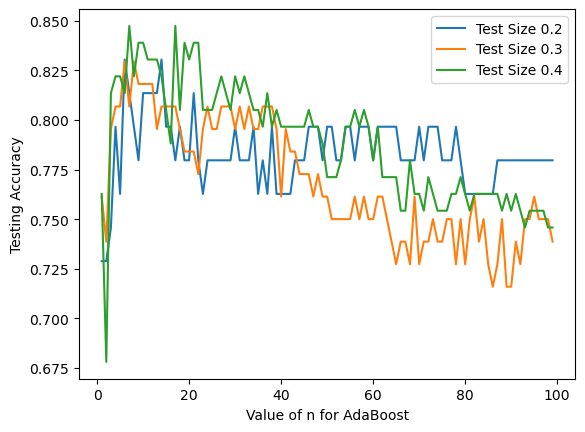

In [154]:
train_points = df_fe.drop(columns=['target'])
train_labels = df_fe['target']

#standardize the dataset
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)

    n_range = range(1, 100)
    accuracy_scores = []

    for n in n_range:
        classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
        classifier.fit(X_train, y_train)
        guesses = classifier.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, guesses))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]

    print("Test Size:", test_size)
    print("최대 정확도: ",max_accuracy,"n =", max_n, "\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for AdaBoost')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

**정확도가 가장 높은 경우를 찾기 위해 테스트 데이터의 사이즈 조정과 n값 튜닝을 같이 진행한 결과, <br>
테스트 데이터 사이즈가 0.2, 0.4인 경우 이전보다 정확도가 오르지 않았고,  <br> 
0.3인 경우에는 이전보다 정확도가 떨어진 것을 확인할 수 있다. <br> 
때문에, 상관관계가 낮은 특성의 데이터를 삭제하지 않고 진행하기로 결정하였다.**

**(4) Feature Scaling**

**모델의 정확도를 높이기 위한 방법 중 네 번째로, Feature Scaling을 말할 수 있다. <br>
앞서 decision tree 알고리즘의 정확도를 올리기 위해 생성한 데이터셋인 <br>
"age", "trestbps", "chol", "thalach", "oldpeak" 칼럼을 정규화한 데이터셋을 사용해 이전과 비교해보았다.**

In [157]:
df_fs.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.528086,0.689420,0.965870,0.355464,0.274378,0.146758,0.518771,0.602142,0.331058,0.170043,1.392491,0.730375,2.320819,0.546075
std,0.191293,0.463523,1.033114,0.166586,0.117364,0.354470,0.527162,0.172813,0.471399,0.189221,0.618946,1.029862,0.613331,0.498724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.480916,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.541667,1.000000,1.000000,0.339623,0.260274,0.000000,1.000000,0.618321,0.000000,0.129032,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.340183,0.000000,1.000000,0.732824,1.000000,0.290323,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


Test Size: 0.2
최대 정확도:  0.8305084745762712 n = 6 

Test Size: 0.3
최대 정확도:  0.8409090909090909 n = 16 

Test Size: 0.4
최대 정확도:  0.847457627118644 n = 8 



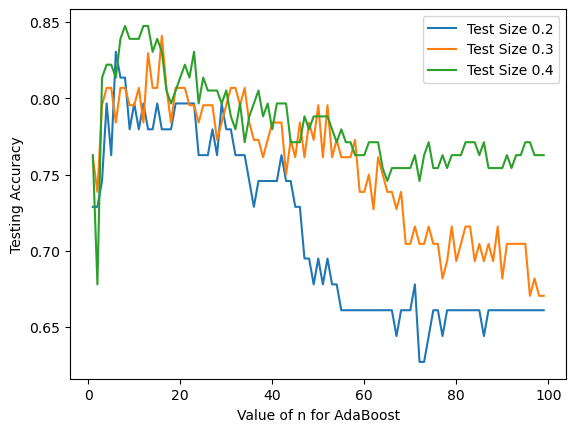

In [158]:
train_points = df_fs.drop(columns=['target'])
train_labels = df_fs['target']

#standardize the dataset
scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels, 
					test_size=test_size, random_state=5)

    n_range = range(1, 100)
    accuracy_scores = []

    for n in n_range:
        classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
        classifier.fit(X_train, y_train)
        guesses = classifier.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, guesses))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]

    print("Test Size:", test_size)
    print("최대 정확도: ",max_accuracy,"n =", max_n, "\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for AdaBoost')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

**정확도가 가장 높은 경우를 찾기 위해 테스트 데이터의 사이즈 조정과 n값 튜닝을 같이 진행한 결과, <br>
train : test = 6:4인 경우 약  85%의 정확도로 이전과 동일함을 알 수 있다.**

## **< Stacking >**

### **Step 1 : Loading dataset**

In [160]:
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63  1.0   3     145.0  233.0    1        0    150.0      0      2.3   
1   37  1.0   2     130.0  250.0    0        1    187.0      0      3.5   
2   41  0.0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56  1.0   1     120.0  236.0    0        1    178.0      0      0.8   
5   57  1.0   0     140.0  192.0    0        1    148.0      0      0.4   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
5      1   0     1       1  
(293, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    float64
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    

**데이터셋의 정보는 위와 같다.**

### **Step 2 : Split into train and test dataset**

In [218]:
train_points = df.drop(columns=['target'])
train_labels = df['target']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points, train_labels, 
					test_size=0.2, random_state=5)

**'target' 열을 라벨 데이터로 선택하고, 'target' 열을 제외한 나머지 데이터를 학습에 사용하고자 한다. <br>
모델 학습을 위해 훈련데이터와 테스트데이터이 비율은 8:2 비율으로 설정하였다. <br>
훈련데이터는 모델을 훈련하는데 사용하는 데이터이며, 테스트데이터는 모델의 성능을 테스트하기 위해 사용할 데이터다. <br>
동일한 결과를 나타내기 위해 random_state의 값은 5로 지정하였다.**

### **Step 3 : Training with Stacking And Checking accuracy**

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from itertools import combinations

all_models = [('knn', KNeighborsClassifier(n_neighbors = 14)),
              ('NB', MultinomialNB()),
              ('svm', SVC(kernel = 'linear')),
              ('rf', RandomForestClassifier(random_state=0, n_estimators=10)),
              ('ad', AdaBoostClassifier(random_state=0, n_estimators=6)),
              ('dt', DecisionTreeClassifier(random_state=0))
              ]

# 두 모델의 모든 가능한 조합 생성
model_combs = list(combinations(all_models, 2))

best_accuracy = 0
best_model_combination = None

for model_comb in model_combs:
    base_models = list(model_comb)
    classifier = StackingClassifier(estimators=base_models, final_estimator=DecisionTreeClassifier(random_state=0))
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, guesses)

    model_combs = tuple(model[0] for model in model_comb)
    print("Model Combination:", model_combs, "Accuracy:", accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_combination = model_comb

print("\nBest Model Combination:", best_model_combination)
print("Accuracy:", best_accuracy)

Model Combination: ('knn', 'NB') Accuracy: 0.6949152542372882
Model Combination: ('knn', 'svm') Accuracy: 0.7627118644067796
Model Combination: ('knn', 'rf') Accuracy: 0.7627118644067796
Model Combination: ('knn', 'ad') Accuracy: 0.7627118644067796
Model Combination: ('knn', 'dt') Accuracy: 0.711864406779661
Model Combination: ('NB', 'svm') Accuracy: 0.8305084745762712
Model Combination: ('NB', 'rf') Accuracy: 0.7457627118644068
Model Combination: ('NB', 'ad') Accuracy: 0.7627118644067796
Model Combination: ('NB', 'dt') Accuracy: 0.7627118644067796
Model Combination: ('svm', 'rf') Accuracy: 0.7627118644067796
Model Combination: ('svm', 'ad') Accuracy: 0.8135593220338984
Model Combination: ('svm', 'dt') Accuracy: 0.7288135593220338
Model Combination: ('rf', 'ad') Accuracy: 0.7627118644067796
Model Combination: ('rf', 'dt') Accuracy: 0.7796610169491526
Model Combination: ('ad', 'dt') Accuracy: 0.7457627118644068

Best Model Combination: (('NB', MultinomialNB()), ('svm', SVC(kernel='linea

**데이터의 학습을 위해 Stacking 모델을 사용하였다. <br>
최적의 모델 조합을 찾기 위해 6개의 다양한 모델을 조합해보았다. <br>
마지막 예측 모델로는 Decision Tree를 사용한 결과, <br>
나이브 베이즈 모델과 SVM 모델을 base model로 사용한 경우에 가장 높은 정확도인 83%를 달성했다.**

### **Step 5 : Improving accuracy**

In [222]:
from sklearn.linear_model import LogisticRegression

all_models = [('knn', KNeighborsClassifier(n_neighbors = 14)),
              ('NB', MultinomialNB()),
              ('svm', SVC(kernel = 'linear')),
              ('rf', RandomForestClassifier(random_state=0, n_estimators=10)),
              ('ad', AdaBoostClassifier(random_state=0, n_estimators=6)),
              ('dt', DecisionTreeClassifier(random_state=0))
              ]

# 두 모델의 모든 가능한 조합 생성
model_combs = list(combinations(all_models, 2))

best_accuracy = 0
best_model_combination = None

for model_comb in model_combs:
    base_models = list(model_comb)
    classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, guesses)

    model_combs = tuple(model[0] for model in model_comb)
    print("Model Combination:", model_combs, "Accuracy:", accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_combination = model_comb

print("\nBest Model Combination:", best_model_combination)
print("Accuracy:", best_accuracy)

Model Combination: ('knn', 'NB') Accuracy: 0.7288135593220338
Model Combination: ('knn', 'svm') Accuracy: 0.7966101694915254
Model Combination: ('knn', 'rf') Accuracy: 0.8135593220338984
Model Combination: ('knn', 'ad') Accuracy: 0.7966101694915254
Model Combination: ('knn', 'dt') Accuracy: 0.7288135593220338
Model Combination: ('NB', 'svm') Accuracy: 0.7966101694915254
Model Combination: ('NB', 'rf') Accuracy: 0.7966101694915254
Model Combination: ('NB', 'ad') Accuracy: 0.7627118644067796
Model Combination: ('NB', 'dt') Accuracy: 0.7966101694915254
Model Combination: ('svm', 'rf') Accuracy: 0.8305084745762712
Model Combination: ('svm', 'ad') Accuracy: 0.7966101694915254
Model Combination: ('svm', 'dt') Accuracy: 0.7966101694915254
Model Combination: ('rf', 'ad') Accuracy: 0.8135593220338984
Model Combination: ('rf', 'dt') Accuracy: 0.7627118644067796
Model Combination: ('ad', 'dt') Accuracy: 0.7288135593220338

Best Model Combination: (('svm', SVC(kernel='linear')), ('rf', RandomFores

**마지막 예측 모델을 Logistic 회귀 모델로 바꾼 결과 <br>
SVM 모델과 Random Forest 모델을 base model로 사용한 경우에 이전과 동일하게 83%의 정확도를 나타냈다.**

## **Compare accuracy of four algorithms**

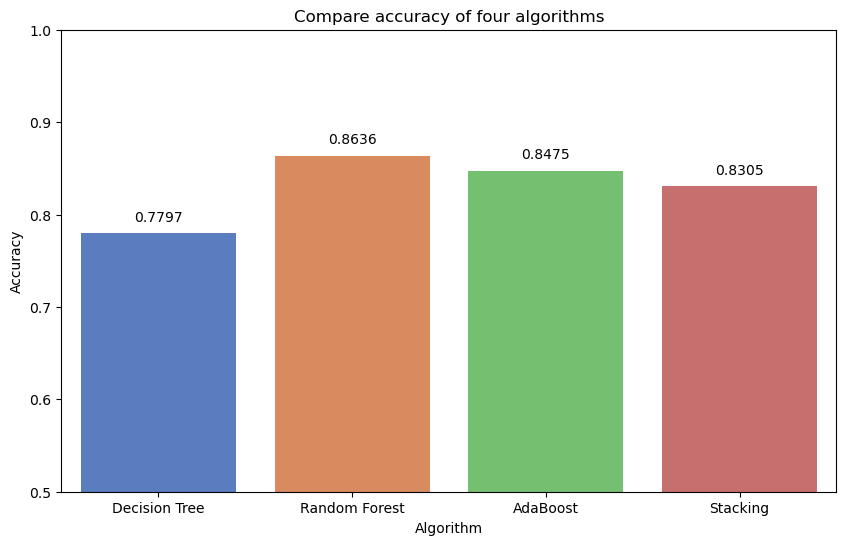

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

algorithms = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Stacking']
accuracies = [0.7796610169491526 , 0.8636363636363636, 0.847457627118644, 0.8305084745762712]

data = {'Algorithm': algorithms, 'Accuracy': accuracies}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=df, palette='muted')
plt.title('Compare accuracy of four algorithms')
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, str(round(value, 4)), ha='center', va='bottom')
plt.ylim(0.5, 1.0)  # y 축 범위 설정
plt.show()